<a href="https://colab.research.google.com/github/PriyaMurali/Data-Analysis/blob/Capstone-Project/M4DataVisualization_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-05-05 13:34:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  36.0MB/s    in 1.0s    

2022-05-05 13:35:00 (36.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


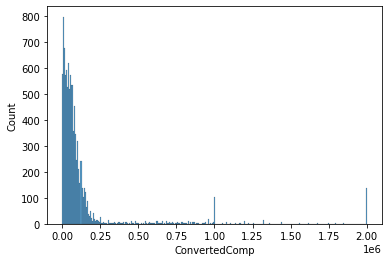

In [ ]:
# your code goes here
QUERY = """
SELECT ConvertedComp,Age
FROM master
"""
ContCompdf=pd.read_sql_query(QUERY,conn)
sns.histplot(data=ContCompdf,x='ConvertedComp')

### Box Plots


Plot a box plot of `Age.`


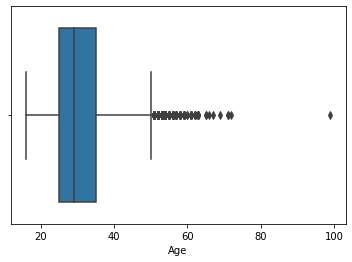

In [ ]:
# your code goes here

QUERY="""
select Age 
from master
"""
agedf=pd.read_sql_query(QUERY,conn)
sns.boxplot(data=agedf,x="Age")

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


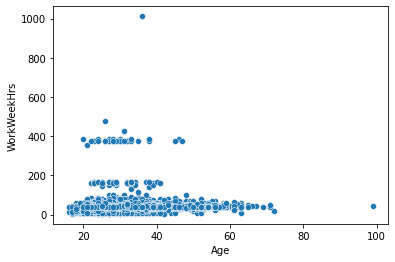

In [ ]:
# your code goes here

QUERY="""
select Age,WorkWeekHrs,CodeRevHrs
from master
"""
awc_df=pd.read_sql_query(QUERY,conn)
sns.scatterplot(data=awc_df,x="Age",y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


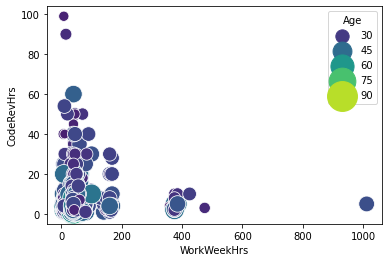

In [ ]:
from matplotlib import colors
from seaborn.palettes import color_palette
# your code goes here
sns.scatterplot(data=awc_df,x="WorkWeekHrs",y='CodeRevHrs',size='Age',sizes=(10,1000),hue="Age",palette="viridis", edgecolors="black")


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here
QUERY="""
select count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""
db_df=pd.read_sql_query(QUERY,conn)
db_df

,Count,DatabaseDesireNextYear
0,4328,PostgreSQL
1,3649,MongoDB
2,3331,Redis
3,3281,MySQL
4,2856,Elasticsearch


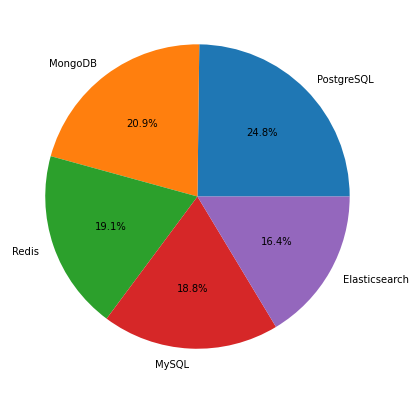

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(db_df['Count'],labels=db_df['DatabaseDesireNextYear'], autopct='%1.1f%%')
plt.show()

In [ ]:
QUERY="""
SELECT LanguageWorkedWith, COUNT(*) as numrespondent
FROM   (SELECT DISTINCT(Respondent), LanguageWorkedWith 
               FROM LanguageWorkedWith)
Group by LanguageWorkedWith
order by numrespondent desc
"""
db_df1=pd.read_sql_query(QUERY,conn)
db_df1

,LanguageWorkedWith,numrespondent
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [ ]:
QUERY="""
SELECT DatabaseWorkedWith,count(Respondent)
FROM DatabaseWorkedWith
group by Respondent having count(DatabaseWorkedWith)=1 and DatabaseWorkedWith='MySQL'
"""
db_df2=pd.read_sql_query(QUERY,conn)
db_df2.value_counts()

DatabaseWorkedWith  count(Respondent)
MySQL               1                    474
dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here
stack_df = awc_df[(awc_df['Age'] >=30) & (awc_df['Age'] <=35)]
stack_df


,Age,WorkWeekHrs,CodeRevHrs
5,31.0,8.0,3.0
11,34.0,40.0,2.0
12,32.0,40.0,2.0
18,34.0,42.0,15.0
22,33.0,40.0,2.0
...,...,...,...
11385,32.0,42.0,4.0
11391,32.0,50.0,2.0
11392,32.0,56.0,14.0
11395,34.0,40.0,5.0


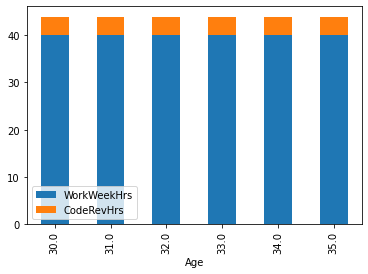

In [ ]:
order = ['WorkWeekHrs', 'CodeRevHrs']
stack_df.groupby('Age')[order].median().plot.bar(stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here

Cont_df=ContCompdf[(ContCompdf['Age']>=45) & (ContCompdf['Age']<=60)]
Cont_df=pd.DataFrame(Cont_df.groupby('Age')['ConvertedComp'].median())
Cont_df

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


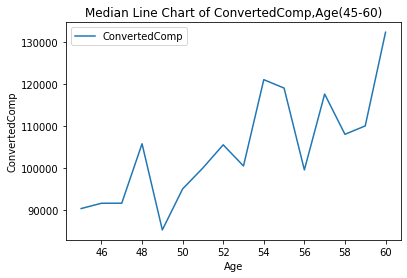

In [ ]:
sns.lineplot(data=Cont_df)
plt.ylabel("ConvertedComp")
plt.title("Median Line Chart of ConvertedComp,Age(45-60)")
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
from pyparsing.core import QuotedString
# your code goes here

QUERY="""
select Count(MainBranch) as Count,MainBranch 
from master
group by MainBranch 
"""
mainBranch_df=pd.read_sql_query(QUERY,conn)
mainBranch_df

,Count,MainBranch
0,10618,I am a developer by profession
1,780,"I am not primarily a developer, but I write co..."


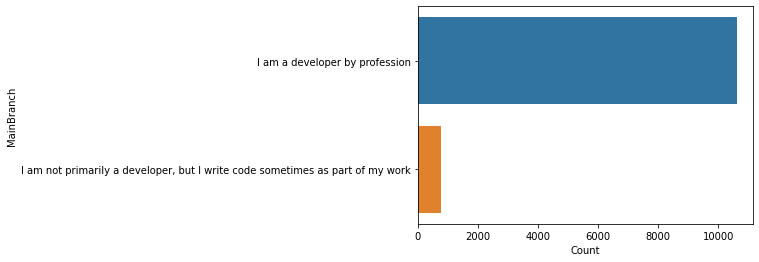

In [ ]:
sns.barplot(data=mainBranch_df,x='Count',y='MainBranch')

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
